# Team members
- Bishal Sainju
- Supratik Chanda
- Victor Lee

# Introduction
We tried to predict, if a person has a heart disease or not. 
We expect to create the model that would generalize well in the real world scenario. 

# Dataset
The dataset that we used is Cleveland heart disease dataset. 
First we cleaned the data, deleted any record having values like '?'. 
Then we checked for outliers and removed them. 
Before feeding our data to the training model, we normalized it using the standard scaler. 

# Analysis Technique
1. Data Cleaning: First, we dropped any abnormal values and then plotted the boxplot to figure out if there was any outliers in the data. There was some harsh outliers in these attributes: ['trestbps', 'chol', 'thalach'] So, we removed those outliers, by removing all the data that was not in the Interquartile range in those attributes. <br>
<img src="outlier.png"><br>
<img src="outlier_rem.png"><br>
2. Data Analysis: Then, we plotted the bar graph to get some idea of the various attributes. <br>
<img src="1.png"><br>
<img src="2.png"><br>
<img src="3.png"><br>
<img src="4.png"><br>
<img src="5.png"><br>
<img src="6.png"><br>
By, this analysis we can see that, cp_4.0 must be important over other cp values. <br>
Similarly, we can see that, 'fbs' attribute is not much important in determining if a person has a heart disease or not. <br>
Similarly, 'restecg_0' and 'restecg_2.0' are important predictors whereas restecg_1.0 is not. <br>
Similarly, 'ca_0' is a much more important characteristics than other values. <br>
Similarly, thal_3.0 and thal_7.0 are important characteristics.<br>
3. Since, we have many categorical attributes, we encoded them using get_dummies. <br>
We applied get_dummies on these attributes: ['cp', 'restecg', 'slope', 'ca', 'thal' ]
4. Next, we wanted to know which attributes were the most important ones. So, we first standardized the data and used  correlation matrix for that. 
<img src="correlation.png"><br>
We can see that attributes like ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach'] are more important because they have higher correlation with the 'num'. <br>
So, we used SelectKBest using f_regression to figure out important features and ordered them in the order of their importance. <br>
['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps', 'thal_6.0', 'chol', 'cp_1.0', 'slope_3.0', 'restecg_1.0', 'fbs']<br>
We got what was expected. <br>
4. Next, we built the custom KNN model and cross-validation method, and using for loops determined which model had the best f1-score. <br>
5. Later, we also used the GridSearchCV method to find out the best parameters for the best estimates. 

# Results
1. From the custom KNN model that we built, we obtained a maximum f1-score of 86.32, when we select 19 best features and 6 nearest neighbors as a parameter to our KNN model. <br>
The 19 best features that it selected were: <br>
N = 19: ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps']<br>
The scores are as follows: <br>
accuracy: 0.883, f1-score: 0.8632, precision: 0.872, recall: 0.8568<br>
2. However, we wanted to implement the pipeline and grid search library to do our task much efficiently. So we run our algorithm and searched using gridsearchCV, and found out that the best parameters were the following: <br>
{'classify__algorithm': 'auto', 'classify__n_neighbors': 11, 'classify__weights': 'uniform', 'reduce_dim': SelectKBest(k=18, score_func=<function f_regression), 'reduce_dim__k': 18, 'reduce_dim__score_func': <function f_regression>}<br>

The best estimate of the f1-score, we obtained was 0.8493<br>
accuracy: 86.88, precision: 88.01,  recall: 82.75<br>

This shows that our custom knn had best f1-score than the built in, it might be because of the difference in the implementaion of cross-validation score and knn classifier. <br>
The built-in cross validation uses stratifying parameter, whereas we have not implemented that. 
We found from the gridsearch that best parameter was not weighted by distance, so we did not implement weighter distance in out implementation of KNN. 


(297, 14)


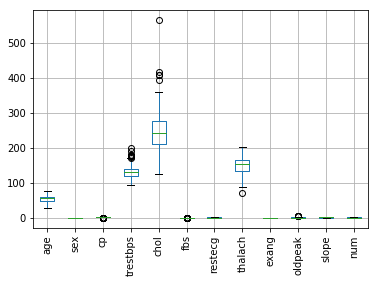

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



hd = pd.read_csv('cleveland.csv')
hd.dropna(inplace=True)
hd = hd[hd.ca != '?']
hd = hd[hd.thal != '?']
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.savefig('outlier.png')
plt.show()


(282, 14)


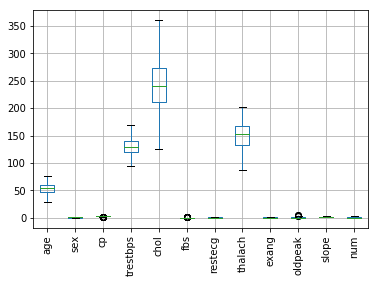

In [112]:
def remove_outliers(hd, cols):
    for col in cols:
        Q3 = hd[col].quantile(.75)
        Q1 = hd[col].quantile(.25)
        IQR = Q3 - Q1
        hd = hd[~((hd[col] < Q1 - 1.5 * IQR) | (hd[col] > Q3 + 1.5 * IQR))]
    return hd

hd = remove_outliers(hd, ['trestbps', 'chol', 'thalach'])
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.savefig('outlier_rem.png')
plt.show()

In [113]:
#num: 1, 2, 3 = 1
hd['num'][hd['num'] != 0] = 1
# hd['num']

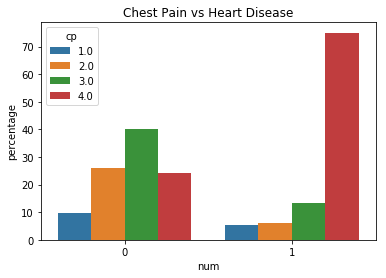

In [114]:
temp = (hd.groupby(['num']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "cp", data = temp)\
.set_title("Chest Pain vs Heart Disease")
plt.savefig('1.png')

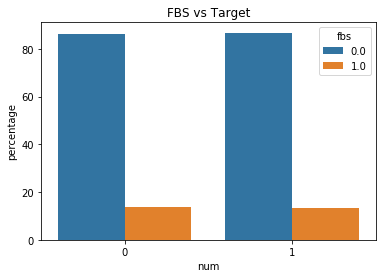

In [115]:
temp = (hd.groupby(['num']))['fbs'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "fbs", data = temp).set_title("FBS vs Target")
plt.savefig('2.png')

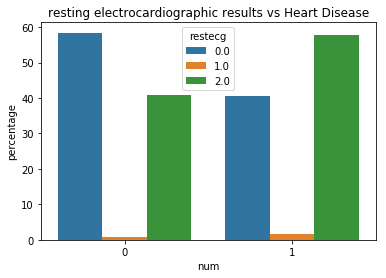

In [116]:
temp = (hd.groupby(['num']))['restecg'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "restecg", data = temp)\
.set_title("resting electrocardiographic results vs Heart Disease")
plt.savefig('3.png')

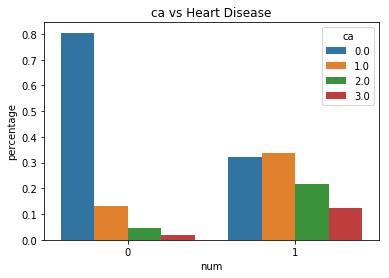

In [117]:
temp = (hd.groupby(['num']))['ca'].value_counts(normalize=True)\
.reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "ca", data = temp)\
.set_title("ca vs Heart Disease")
plt.savefig('4.png')

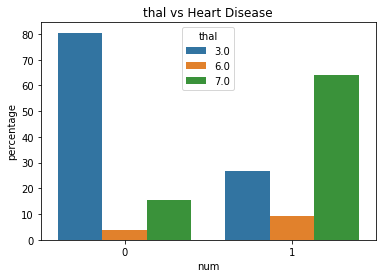

In [118]:
temp = (hd.groupby(['num']))['thal'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "thal", data = temp)\
.set_title("thal vs Heart Disease")
plt.savefig('5.png')

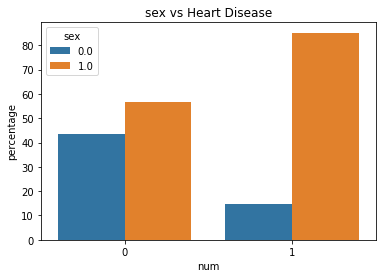

In [119]:
temp = (hd.groupby(['num']))['sex'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "sex", data = temp)\
.set_title("sex vs Heart Disease")
plt.savefig('6.png')

In [120]:
#discretize the data (get_dummies)
hd = pd.get_dummies(hd, columns=['cp', 'restecg', 'slope', 'ca', 'thal' ], drop_first=False)
hd.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,0,...,1,0,0,1,0,0,0,1,0,0


In [121]:
#standardize the data
from sklearn import preprocessing
col_to_norm = hd.columns.tolist()
col_to_norm.remove('num')
hd[col_to_norm] = preprocessing.StandardScaler().fit_transform(hd[col_to_norm])
hd.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.969368,0.662401,0.956135,-0.226835,2.533980,0.012802,-0.684653,1.123914,0,3.437758,...,-0.958315,-0.911685,3.720498,0.842075,-0.53635,-0.376431,-0.268781,-1.128802,3.829708,-0.776062
1,1.410275,0.662401,1.916813,0.947896,-0.394636,-1.836246,1.460593,0.420181,1,-0.290887,...,-0.958315,1.096871,-0.268781,-1.187542,-0.53635,-0.376431,3.720498,0.885895,-0.261116,-0.776062
2,1.410275,0.662401,-0.644994,-0.315494,-0.394636,-0.911722,1.460593,1.387814,1,-0.290887,...,-0.958315,1.096871,-0.268781,-1.187542,-0.53635,2.656528,-0.268781,-1.128802,-0.261116,1.288556
3,-1.896523,0.662401,-0.004542,0.149966,-0.394636,1.641724,-0.684653,2.179514,0,-0.290887,...,-0.958315,-0.911685,3.720498,0.842075,-0.53635,-0.376431,-0.268781,0.885895,-0.261116,-0.776062
4,-1.455616,-1.509659,-0.004542,-0.869612,-0.394636,0.981350,-0.684653,0.332214,0,-0.290887,...,1.043498,-0.911685,-0.268781,0.842075,-0.53635,-0.376431,-0.268781,0.885895,-0.261116,-0.776062


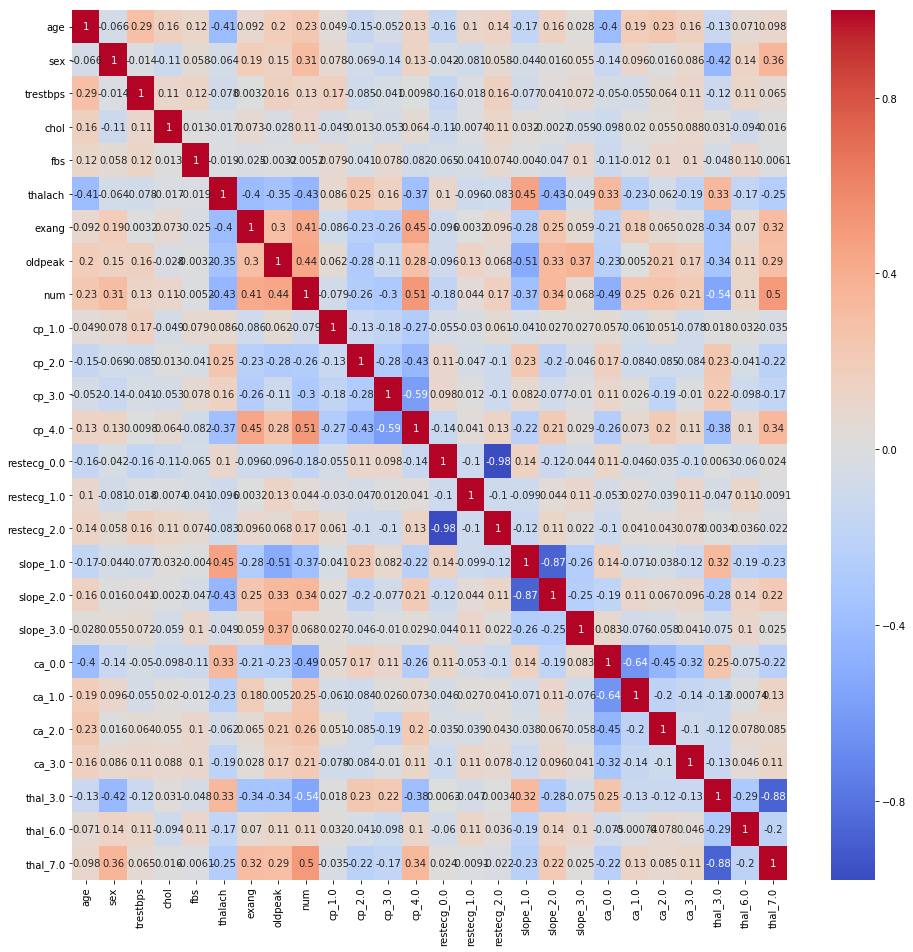

In [122]:
plt.figure(figsize=(16,16))
sns.heatmap(hd.corr(),annot=True,cmap='coolwarm')
plt.savefig('correlation.png')
plt.show()

In [123]:
print(hd.corr()['num'])

age            0.230561
sex            0.309960
trestbps       0.131340
chol           0.105463
fbs           -0.005178
thalach       -0.433597
exang          0.414825
oldpeak        0.438209
num            1.000000
cp_1.0        -0.079296
cp_2.0        -0.261296
cp_3.0        -0.299103
cp_4.0         0.508388
restecg_0.0   -0.177411
restecg_1.0    0.044314
restecg_2.0    0.168382
slope_1.0     -0.374651
slope_2.0      0.341924
slope_3.0      0.067508
ca_0.0        -0.489967
ca_1.0         0.246310
ca_2.0         0.261680
ca_3.0         0.209577
thal_3.0      -0.541220
thal_6.0       0.111589
thal_7.0       0.498312
Name: num, dtype: float64


In [124]:
#Which features are the most important (arrange them in descending order)
from sklearn.feature_selection import SelectKBest, f_regression

X = hd[col_to_norm].values.astype(np.float)
y = hd['num'].values.astype(np.float)
k_best = SelectKBest(f_regression, k=len(col_to_norm)).fit(X, y)
score = np.array(k_best.scores_)
rank = score.argsort()[-len(col_to_norm):][::-1]
features = []
for i in rank:
    features.append(col_to_norm[i])
print(features)

['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps', 'thal_6.0', 'chol', 'cp_1.0', 'slope_3.0', 'restecg_1.0', 'fbs']


In [125]:
#building custom model
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,\
                classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors

def classification_report_cm(y_true, y_pred):
    print (classification_report(y_true, y_pred))
    print (confusion_matrix(y_true, y_pred))

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def knn(X_train, y_train, X_test, k):
    neigh = NearestNeighbors(n_neighbors=k).fit(X_train, y_train)
    y_pred_list = neigh.kneighbors(X_test, return_distance=False)
    y_pred = [[y_train[i] for i in indices] for indices in y_pred_list]
    # print(y_pred)
    y_pred = [max(y,key=y.count) for y in y_pred]
    return np.asarray(y_pred)

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

def get_score(data, k, n):
    # print(data.shape)
    data_list = chunkIt(data, n)
    f1_list = []
    acc_list = []
    prec_list = []
    rec_list = []
    for i in range(n):
        data_split = data_list.copy()
        test = np.asarray(data_split.pop(i))
        train = np.asarray([j for k in data_split for j in k])
        X_train, y_train, X_test, y_test = train[:, :-1], train[:, -1], test[:, :-1], test[:, -1]
        y_pred = knn(X_train, y_train, X_test, k)
        print('Cross-Val: {} '.format(i))
        classification_report_cm(y_test, y_pred)
        f1_score = f1(y_test, y_pred)
        acc = accuracy(y_test, y_pred)
        prec = precision(y_test, y_pred)
        rec = recall(y_test, y_pred)
        print('f1: {}, acc: {}'.format(f1_score, acc))
        print("")
        f1_list.append(f1_score)
        acc_list.append(acc)
        prec_list.append(prec)
        rec_list.append(rec)
    return np.asarray(f1_list).mean().round(4), np.asarray(acc_list).mean().round(4),\
            np.asarray(prec_list).mean().round(4), np.asarray(rec_list).mean().round(4)

In [126]:
import json

#shuffle data
hd2 = hd.sample(frac=1, random_state=5).reset_index(drop=True)
# K = range(5, 15)
# num_attr = range(15, 21)
K = [6]
num_attr = [19]
score = {}
for n in num_attr:
    score[n] = {}
    feat = features[:n]
    print('N = {}: {}\n'.format(n, feat))
    feat.append('num')
    hd1 = hd2[feat]
    hd_data = hd1.values.astype(float)
    for k in K:
        score[n][k] = {}
        score[n][k]['f1'], score[n][k]['acc'], score[n][k]['prec'], score[n][k]['rec'] = get_score(hd_data, k, 5)
print(json.dumps(score, indent=4, sort_keys=True))


N = 19: ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps']

Cross-Val: 0 
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        35
         1.0       0.77      0.81      0.79        21

   micro avg       0.84      0.84      0.84        56
   macro avg       0.83      0.83      0.83        56
weighted avg       0.84      0.84      0.84        56

[[30  5]
 [ 4 17]]
f1: 0.7906976744186046, acc: 0.8392857142857143

Cross-Val: 1 
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.96      0.93      0.95        28

   micro avg       0.95      0.95      0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56

[[27  1]
 [ 2 26]]
f1: 0.94545454

In [127]:
X = hd[col_to_norm].values.astype(np.float)
y = hd['num'].values.astype(np.float)

In [132]:
#Using built in KNN, pipeline and gridsearch
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif, mutual_info_classif, \
    mutual_info_regression, RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('reduce_dim', None),
    ('classify', KNeighborsClassifier())
])

# N_FEATURES_OPTIONS = range(10, 25)
N_FEATURES_OPTIONS = [18]
# K_OPTIONS = range(5, 15)
K_OPTIONS = [11]
SCORE_FUNC = [f_regression]
ALG = ['auto']
WT = ['uniform']
param_grid = [
#     {
#         'reduce_dim': [PCA()],
#         'reduce_dim__n_components': N_FEATURES_OPTIONS,
#         'classify__n_neighbors': K_OPTIONS,
#         'classify__weights':WT,
#         'classify__algorithm': ALG
#     },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'reduce_dim__score_func': SCORE_FUNC,
        'classify__n_neighbors': K_OPTIONS,
        'classify__weights': WT,
        'classify__algorithm': ALG
    }
]
grid = GridSearchCV(pipe, cv=10, param_grid=param_grid, scoring='recall')
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'classify__algorithm': 'auto', 'classify__n_neighbors': 11, 'classify__weights': 'uniform', 'reduce_dim': SelectKBest(k=18, score_func=<function f_regression at 0x1a1e249c80>), 'reduce_dim__k': 18, 'reduce_dim__score_func': <function f_regression at 0x1a1e249c80>}
0.8274686306601201


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
